# Applied Machine Learning (Assignment # 1)

### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### Data Pre-Processing, Exploratory Data Analysis and Handling Outliers

Features Distribution:


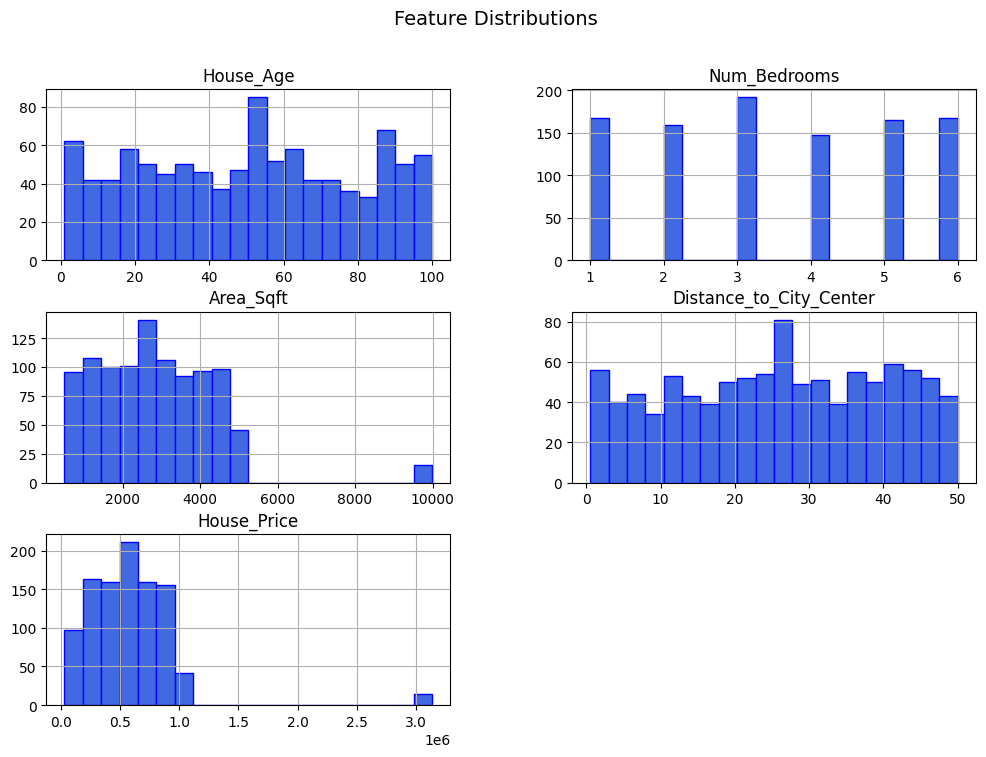

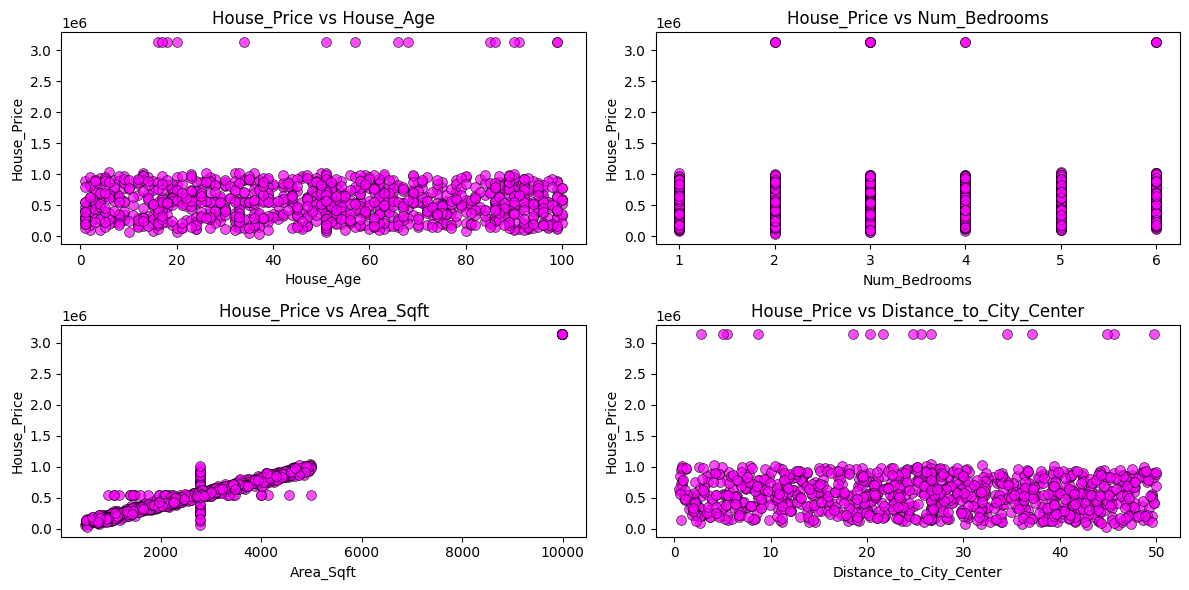

Data after outlier removal: (985, 5)


In [2]:
df = pd.read_csv("data/linear_regression_dataset.csv")

# Handling missing values
df_filled = df.copy()
for col in df_filled.columns:
    df_filled[col] = df_filled[col].fillna(df_filled[col].median())

print("Features Distribution:")
# EDA
color = "royalblue"
edge_color = "blue"
df_filled.hist(
    bins=20, 
    figsize=(12, 8), 
    color=color,        
    edgecolor=edge_color 
)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Plotting results
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_filled.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(
        x=df_filled[col], 
        y=df_filled["House_Price"], 
        color="magenta",       
        edgecolor="black",        
        s=50,                     
        alpha=0.7                
    )
    plt.xlabel(col)
    plt.ylabel("House_Price")
    plt.title(f"House_Price vs {col}")
plt.tight_layout()
plt.show()

# Removing outliers
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_cleaned = remove_outliers(df_filled, df_filled.columns)

print("Data after outlier removal:", df_cleaned.shape)


#### Normalization, Correlation and Polynomial Features

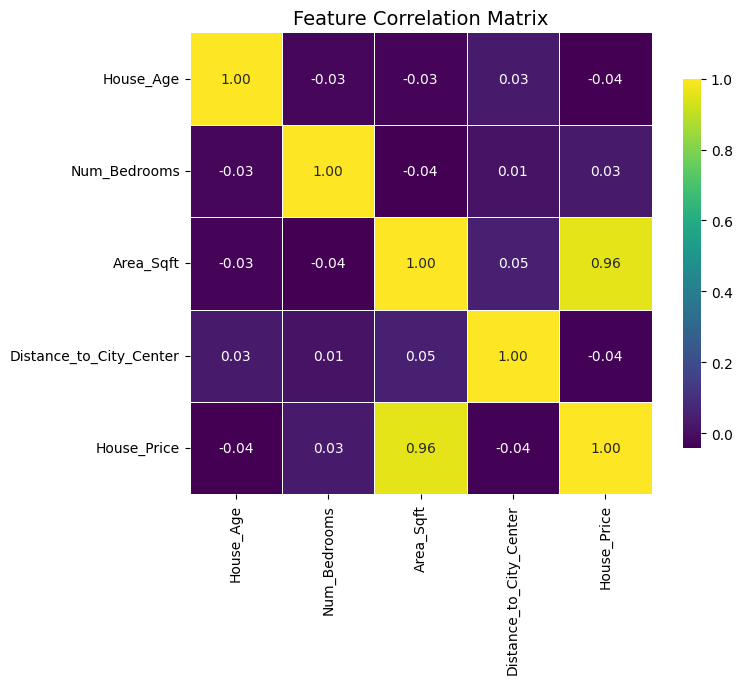

Shape after polynomial feature expansion: (985, 14)


In [ ]:
# Normalization
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[df_scaled.columns[:-1]] = scaler.fit_transform(df_cleaned[df_cleaned.columns[:-1]])

# Correlation Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_scaled.corr(), 
    annot=True, 
    cmap="viridis",    
    fmt=".2f", 
    linewidths=0.5,     
    linecolor='white',  
    square=True,        
    cbar_kws={"shrink": 0.8}  
)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

# Polynomial Features 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_scaled[df_scaled.columns[:-1]])

print("Shape after polynomial feature expansion:", X_poly.shape)


#### Linear Regression Model Training

In [4]:
# Split into training and test
X = df_scaled[df_scaled.columns[:-1]]
y = df_scaled["House_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluating the model
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Model Performance:
MAE: 32589.9102
MSE: 5225441438.0092
R² Score: 0.9172


#### Linear Regression Gradient Descent

In [5]:
# Using sklearn
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the Gradient Descent model
gd_model = LinearRegressionGD(learning_rate=0.01, iterations=1000)
gd_model.fit(X_train.values, y_train.values)

y_pred_gd = gd_model.predict(X_test.values)

# Evaluate Gradient Descent Model
mae_gd = mean_absolute_error(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Gradient Descent Linear Regression Performance:")
print(f"MAE: {mae_gd:.4f}")
print(f"MSE: {mse_gd:.4f}")
print(f"R² Score: {r2_gd:.4f}")


Gradient Descent Linear Regression Performance:
MAE: 32590.7697
MSE: 5225742204.3267
R² Score: 0.9172


#### Finally, predicting the price for house.

In [6]:
# Prediction for house prices
def predict_house_price(new_data, model, scaler):
    """Predict house price for new data using the trained model."""
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)
    return prediction[0]

# New data points
new_house_data = [3, 2, 1500, 10] 
predicted_price = predict_house_price(new_house_data, lr_model, scaler)
print(f"Predicted House Price: {predicted_price:.2f}")


Predicted House Price: 312154.86


C:\Users\AMASH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\AMASH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
